we build ml model todetect sms is spam or normal message.now create spam detection model.convert all data of dataset into lowercase.remove punctuations,stopwords,check msgs.
convert all text into vectors using vectorization technique called word embedding.

import classifier algorithm.we divide data into train and test and apply model on training data and then we test it to check accuracy using confusion matrix.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [15]:
import pandas as pd

# Load TSV file
df = pd.read_csv(r"C:\Users\Welcome\Downloads\sms+spam+collection\spam.tsv", sep="\t", header=None, names=["label", "message"])

# Preview
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [18]:
print('shape=>',df.shape)

shape=> (5572, 2)


In [20]:
print('ham and spam counts','\n',df.label.value_counts())

ham and spam counts 
 label
ham     4825
spam     747
Name: count, dtype: int64


In [21]:
#now check ratio of ham and spam messages
print('spam ratio=',round(len(df[df['label']=='spam'])/len(df.label),2)*100,'%')

spam ratio= 13.0 %


In [22]:
#now check ratio of ham and spam messages
print('spam ratio=',round(len(df[df['label']=='ham'])/len(df.label),2)*100,'%')

spam ratio= 87.0 %


ham and spam messages divided by tottal no .of messages gives us the ratio.

now we create new column called length to check message 's length .this is length of original raw message length.then we preprocess and also calculate the length of cleaned message

In [23]:
df['length']=df.message.str.len()
df.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


since ml model wont understand any message so we convert that text into numbers.and also convert the labels its only has 2 classes ham and spam 

In [24]:
df['label'].replace({'ham':0,'spam':1},inplace=True)

In [25]:
#convert all messages to lowercase
df['message']=df['message'].str.lower()
df.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


this is binary classification problem.then preprocess the message ,remove punctuations,regular expressions,etc

^,. are meta chars 

^ matches start position of any line   and . matches single char
refer elec 2 nlp for regex

In [26]:
#replace email addrress with email
df['message']=df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [29]:
#spammers shares links urls to open

In [27]:
#replace urls with webaddress
df['message']=df['message'].str.replace(r'^http\:??[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [28]:
#replace money symbols
df['message']=df['message'].str.replace(r'$|\$','dollars')

spam mail will ask money $ so we check and replace to find the message.us phone numbers is in format 123_345_5678 so replace digits with phone numbers.in model building we cant use this phone numbers.

In [30]:
#replace phone numbers
df['message']=df['message'].str.replace(r'^\(?[\d]{3}\)?[\S-]?[\d]{3}[\S-]?[/d]{4}$','phonenumber')

In [31]:
#replace phonenumbers with numbers i.e any numbers
df['message']=df['message'].str.replace(r'\d+(\.\d+)?','number')

In [32]:
#remove punctuations
df['message']=df['message'].str.replace(r'[^\w\d\s]','')
#^ is not equal to words,digits or spaces then we replace with space

In [33]:
#replace whitespace between terms with asingle space
df['message']=df['message'].str.replace(r'\S+','')
#  S+ is single space between terms

In [34]:
#remove leading and trainling whitespaces and replace withsimple space
df['message']=df['message'].str.replace(r'^\S+|\S+?$',' ')


In [35]:
df.head(10)

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61
5,1,freemsg hey there darling it's been 3 week's n...,147
6,0,even my brother is not like to speak with me. ...,77
7,0,as per your request 'melle melle (oru minnamin...,160
8,1,winner!! as a valued network customer you have...,157
9,1,had your mobile 11 months or more? u r entitle...,154


In [37]:
#data is clean now
#remove stopwords now
import string
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english')+['u','ur','4','2',',im','dont','doin','ure'])
df['message']=df['message'].apply(lambda x:''.join(term for term in x.split() if term not in stop_words))

4->for
2->to
you->u
your->ur
in df['message'] each word will be stored one by one and we join in same line of 'message' column

In [38]:
df['clean_length']=df.message.str.len()
df.head()
#after preprocessing the junk the clean data is

,label,message,length,clean_length
0,0,"gojurongpoint,crazy..availablebugisngreatworld...",111,76
1,0,oklar...jokingwifoni...,29,23
2,1,freeentrywklycompwinfacupfinaltkts21stmay2005....,155,118
3,0,dunsayearlyhor...calreadysay...,49,31
4,0,"nahthinkgoesusf,livesaroundthough",61,33


In [39]:
#total length removal
print('original length',df.length.sum())
print('clean length',df.clean_length.sum())

original length 448490
clean length 275759


junk data should be removed before passing to ml model and lets see data distribution

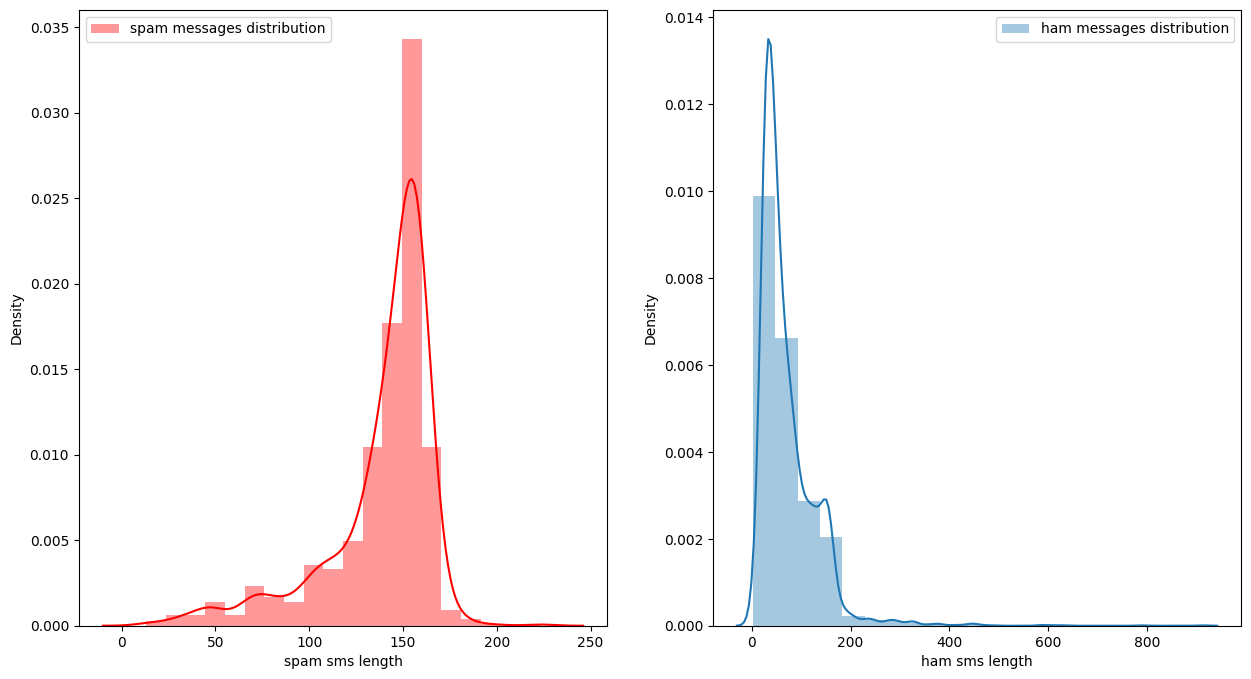

In [44]:
#Since we got 'length' and 'clean_length'  
#First we go to take 'length' here and see its distribution

# Message distribution BEFORE cleaning
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.distplot(df[df['label'] == 1]['length'], bins=20, ax=ax[0],
   label='spam messages distribution', color='r')

ax[0].set_xlabel('spam sms length')  
ax[0].legend()

sns.distplot(df[df['label'] == 0]['length'], bins=20, ax=ax[1],
   label='ham messages distribution')

ax[1].set_xlabel('ham sms length')  
ax[1].legend()  
plt.show()

# we are gonna check ham message length & use distplot to plot & see how data is distributed
# we use distribution plot
# we are selecting label = 1 & label = 0 here


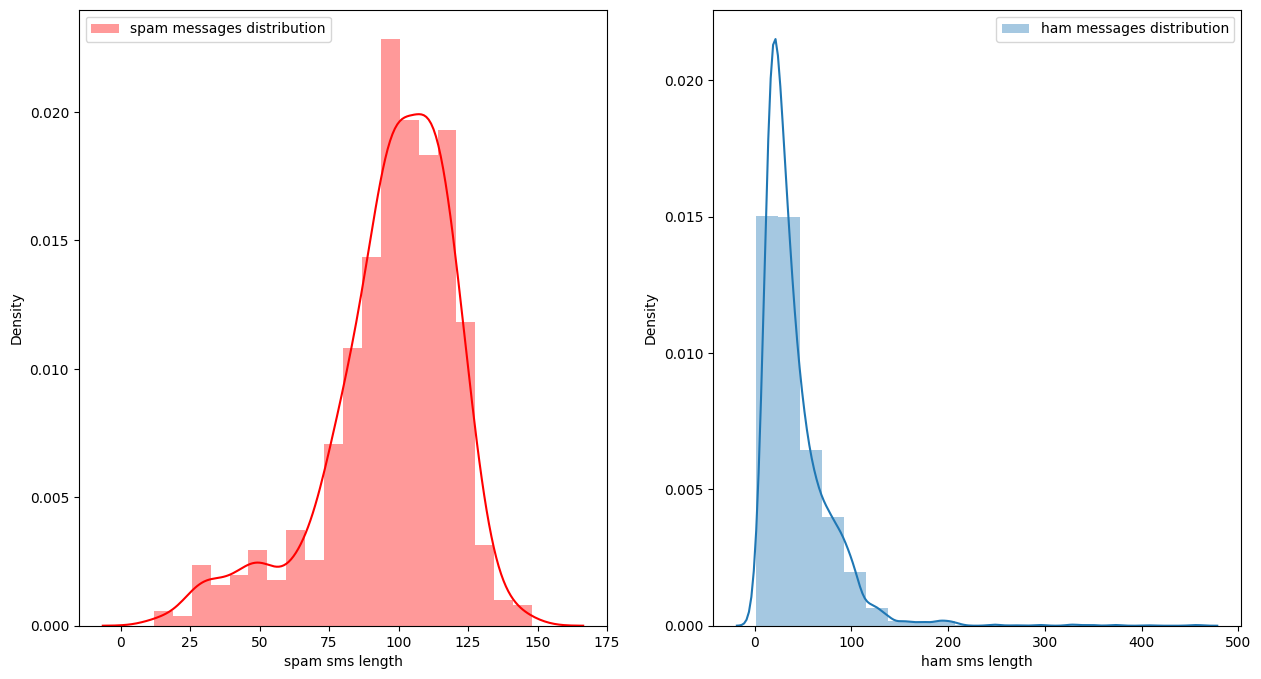

In [45]:
#First we go to take 'clean_length' here and see its distribution

# Message distribution BEFORE cleaning
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.distplot(df[df['label'] == 1]['clean_length'], bins=20, ax=ax[0],
   label='spam messages distribution', color='r')

ax[0].set_xlabel('spam sms length')  
ax[0].legend()

sns.distplot(df[df['label'] == 0]['clean_length'], bins=20, ax=ax[1],
   label='ham messages distribution')

ax[1].set_xlabel('ham sms length')  
ax[1].legend()  
plt.show()

# we are gonna check ham message length & use distplot to plot & see how data is distributed
# we use distribution plot
# we are selecting label = 1 & label = 0 here

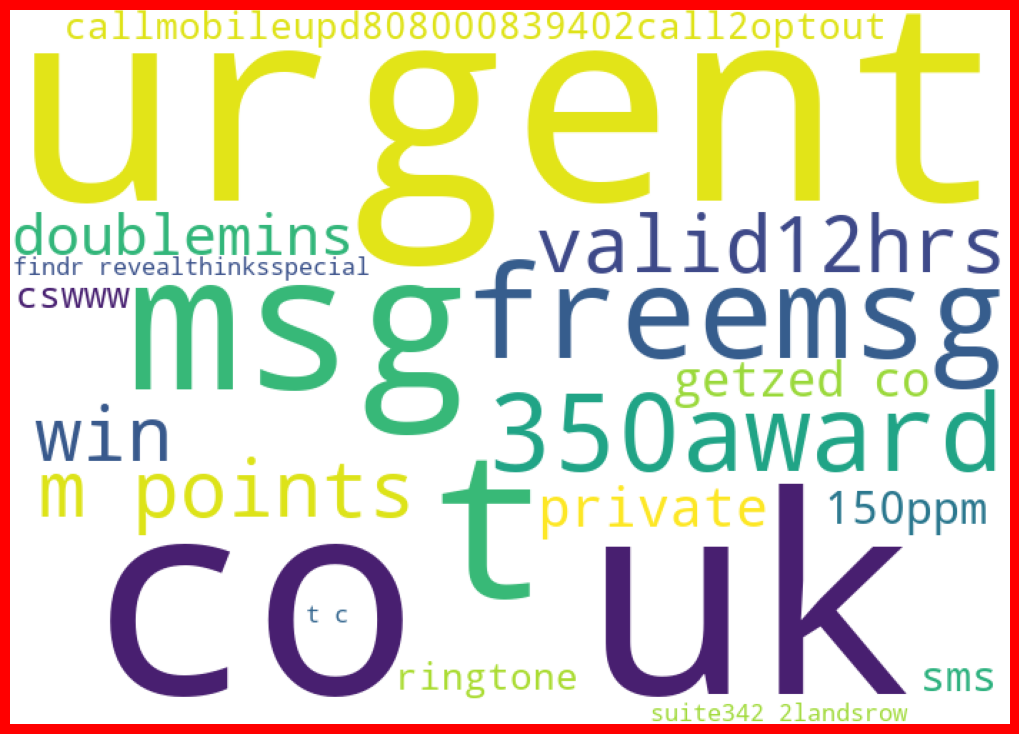

In [47]:
#getting loud wors in spam
# Getting sense of Loud words in spam
from wordcloud import WordCloud

spams = df['message'][df['label'] == 1]

spam_cloud = WordCloud(width=700,  
                         height=500,  
                         background_color='white',  
                         max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8), facecolor='r')  
plt.imshow(spam_cloud)  
plt.axis('off')  
plt.tight_layout(pad=0)  
plt.show()


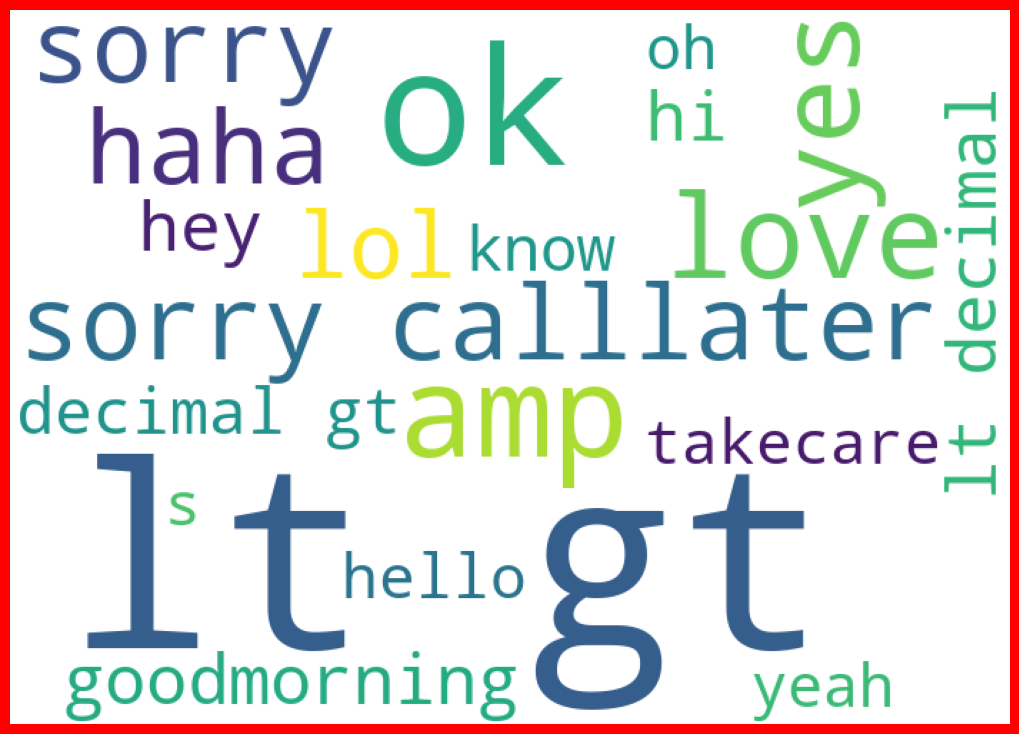

In [48]:
#wordcloud is get sense of loud words that occurs more no of times 
#these loud words only comes in spam messages
#now let see loud words for ham or normal message so hence label==0
from wordcloud import WordCloud

spams = df['message'][df['label'] == 0]

spam_cloud = WordCloud(width=700,  
                         height=500,  
                         background_color='white',  
                         max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8), facecolor='r')  
plt.imshow(spam_cloud)  
plt.axis('off')  
plt.tight_layout(pad=0)  
plt.show()

lets use now tfidf vectorization and then build MultinomialNB model from sklearn_naivebayes.MultinomialNB works on a probablistic factor.it will check each and every data and compare with existing data in message.and comes up with label on probability.MultinomialNB works well for text classification.

In [51]:
#first convert text into vectors using tfidf
#instantiate MutinomialNB classifier
#split feature and label
'''MultinomialNB / Naive Bayes algorithm  
works better for text classification  '''

# Convert text into vectors using TF-IDF  
# Instantiate MultinomialNB classifier  
# Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer  

from sklearn.naive_bayes import MultinomialNB  
from sklearn.model_selection import train_test_split  

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report  

tf_vec = TfidfVectorizer()  

naive = MultinomialNB()  

features = tf_vec.fit_transform(df['message'])  

x = features  
y = df['label']  
# we use this with fit_transform() method and it transforms the entire
#message.all text of message will be converted into numbers or cvectors.
#those numbers we store numbers into x variable. and y is the label


in ml model building x is having all vectors and y is having classes .split data of features of x as train and test data.we use naive model .fit() method where we pass x_trin and y_train and we predict with x_test and predict y_pred then check accuracy score

In [53]:
# Train + Predict
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

naive.fit(x_train, y_train)

y_pred = naive.predict(x_test)

print("Final score => ", accuracy_score(y_test, y_pred))

# Final score => 0.9705671  
# It is the accuracy score

print(classification_report(y_test, y_pred))


Final score =>  0.9167264895908112
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1207
           1       1.00      0.38      0.55       186

    accuracy                           0.92      1393
   macro avg       0.96      0.69      0.75      1393
weighted avg       0.92      0.92      0.90      1393



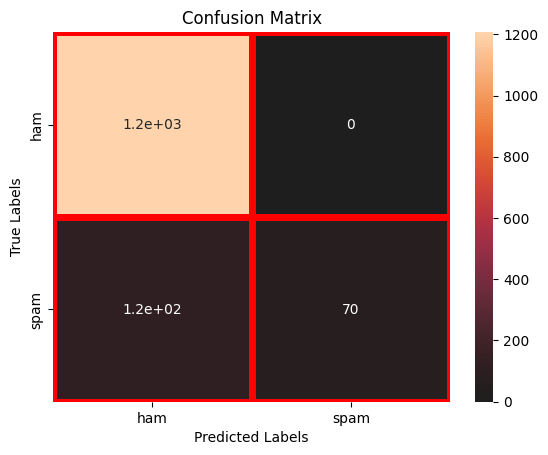

In [54]:
# Plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test, y_pred)

ax = plt.subplot()

sns.heatmap(conf_mat, annot=True,
            ax=ax, linewidths=5,
            linecolor='r', center=0)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])

plt.show()


In [55]:
conf_mat

array([[1207,    0],
       [ 116,   70]], dtype=int64)

             Predicted Labels
            ------------------
            |  ham  | spam   |
-------------------------------
ham   |  1202  |   0     |
spam  |    4    |  150    |


conf_mat = array([[1202, 0],
                  [4, 150]], dtype=int64)


1202 → TP (True Positives)

0 → FP (False Positives)

4 → FN (False Negatives)

150 → TN (True Negatives)

Explanation Notes:
We don’t have any FP (False Positives).

It means that it didn’t predict any messages as positive when in reality it is false — which is a good thing.

We have predicted some negative messages but in reality they were positive → These are False Negatives.

These are right data which we predicted correctly → refers to TP and TN.

Based on this, anyone can analyze and try to do some more...